<a href="https://colab.research.google.com/github/warut/DrivenData/blob/PracticeFluShots/Driven_Data_Practice_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q "google-generativeai>=0.8.3"

In [ ]:
import os
import shutil

from google.colab import files

kaggle_dir = '/root/.kaggle'
#kaggle_json_drive = '/content/drive/My Drive/kaggle/kaggle.json'
kaggle_json_colab = f'{kaggle_dir}/kaggle.json'

os.makedirs(kaggle_dir, exist_ok=True)

# Upload kaggle.json if it doesn't already exist
if not os.path.exists(kaggle_json_colab):
    uploaded = files.upload()
    shutil.move('kaggle.json', kaggle_json_colab)
    os.chmod(kaggle_json_colab, 0o600)


Saving kaggle.json to kaggle.json


In [1]:
import google.generativeai as genai
from IPython.display import HTML, Markdown, display

In [2]:
#from kaggle_secrets import UserSecretsClient

#GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
from google.colab import files
files.upload()

In [5]:
!ls /content

sample_data  test_set_features.csv  training_set_features.csv  training_set_labels.csv


In [6]:
import numpy as np
import pandas as pd

ptrain = "/content/training_set_features.csv"
ptest = "/content/test_set_features.csv"
df_train=pd.read_csv(ptrain)
df_test=pd.read_csv(ptest)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [18]:
df_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [14]:
df_train_out = pd.read_csv("/content/training_set_labels.csv")
df_train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [17]:
df_train_out.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [19]:
# Selecting numeric columns (of type 'float' or 'int') from the 'factors' DataFrame
numeric_columns = df_train.select_dtypes(include=['float', 'int']).columns

# Selecting object columns (of type 'object') from the 'factors' DataFrame
object_columns = df_train.select_dtypes(include=['object']).columns

In [27]:
numeric_columns=numeric_columns.drop(['respondent_id'])

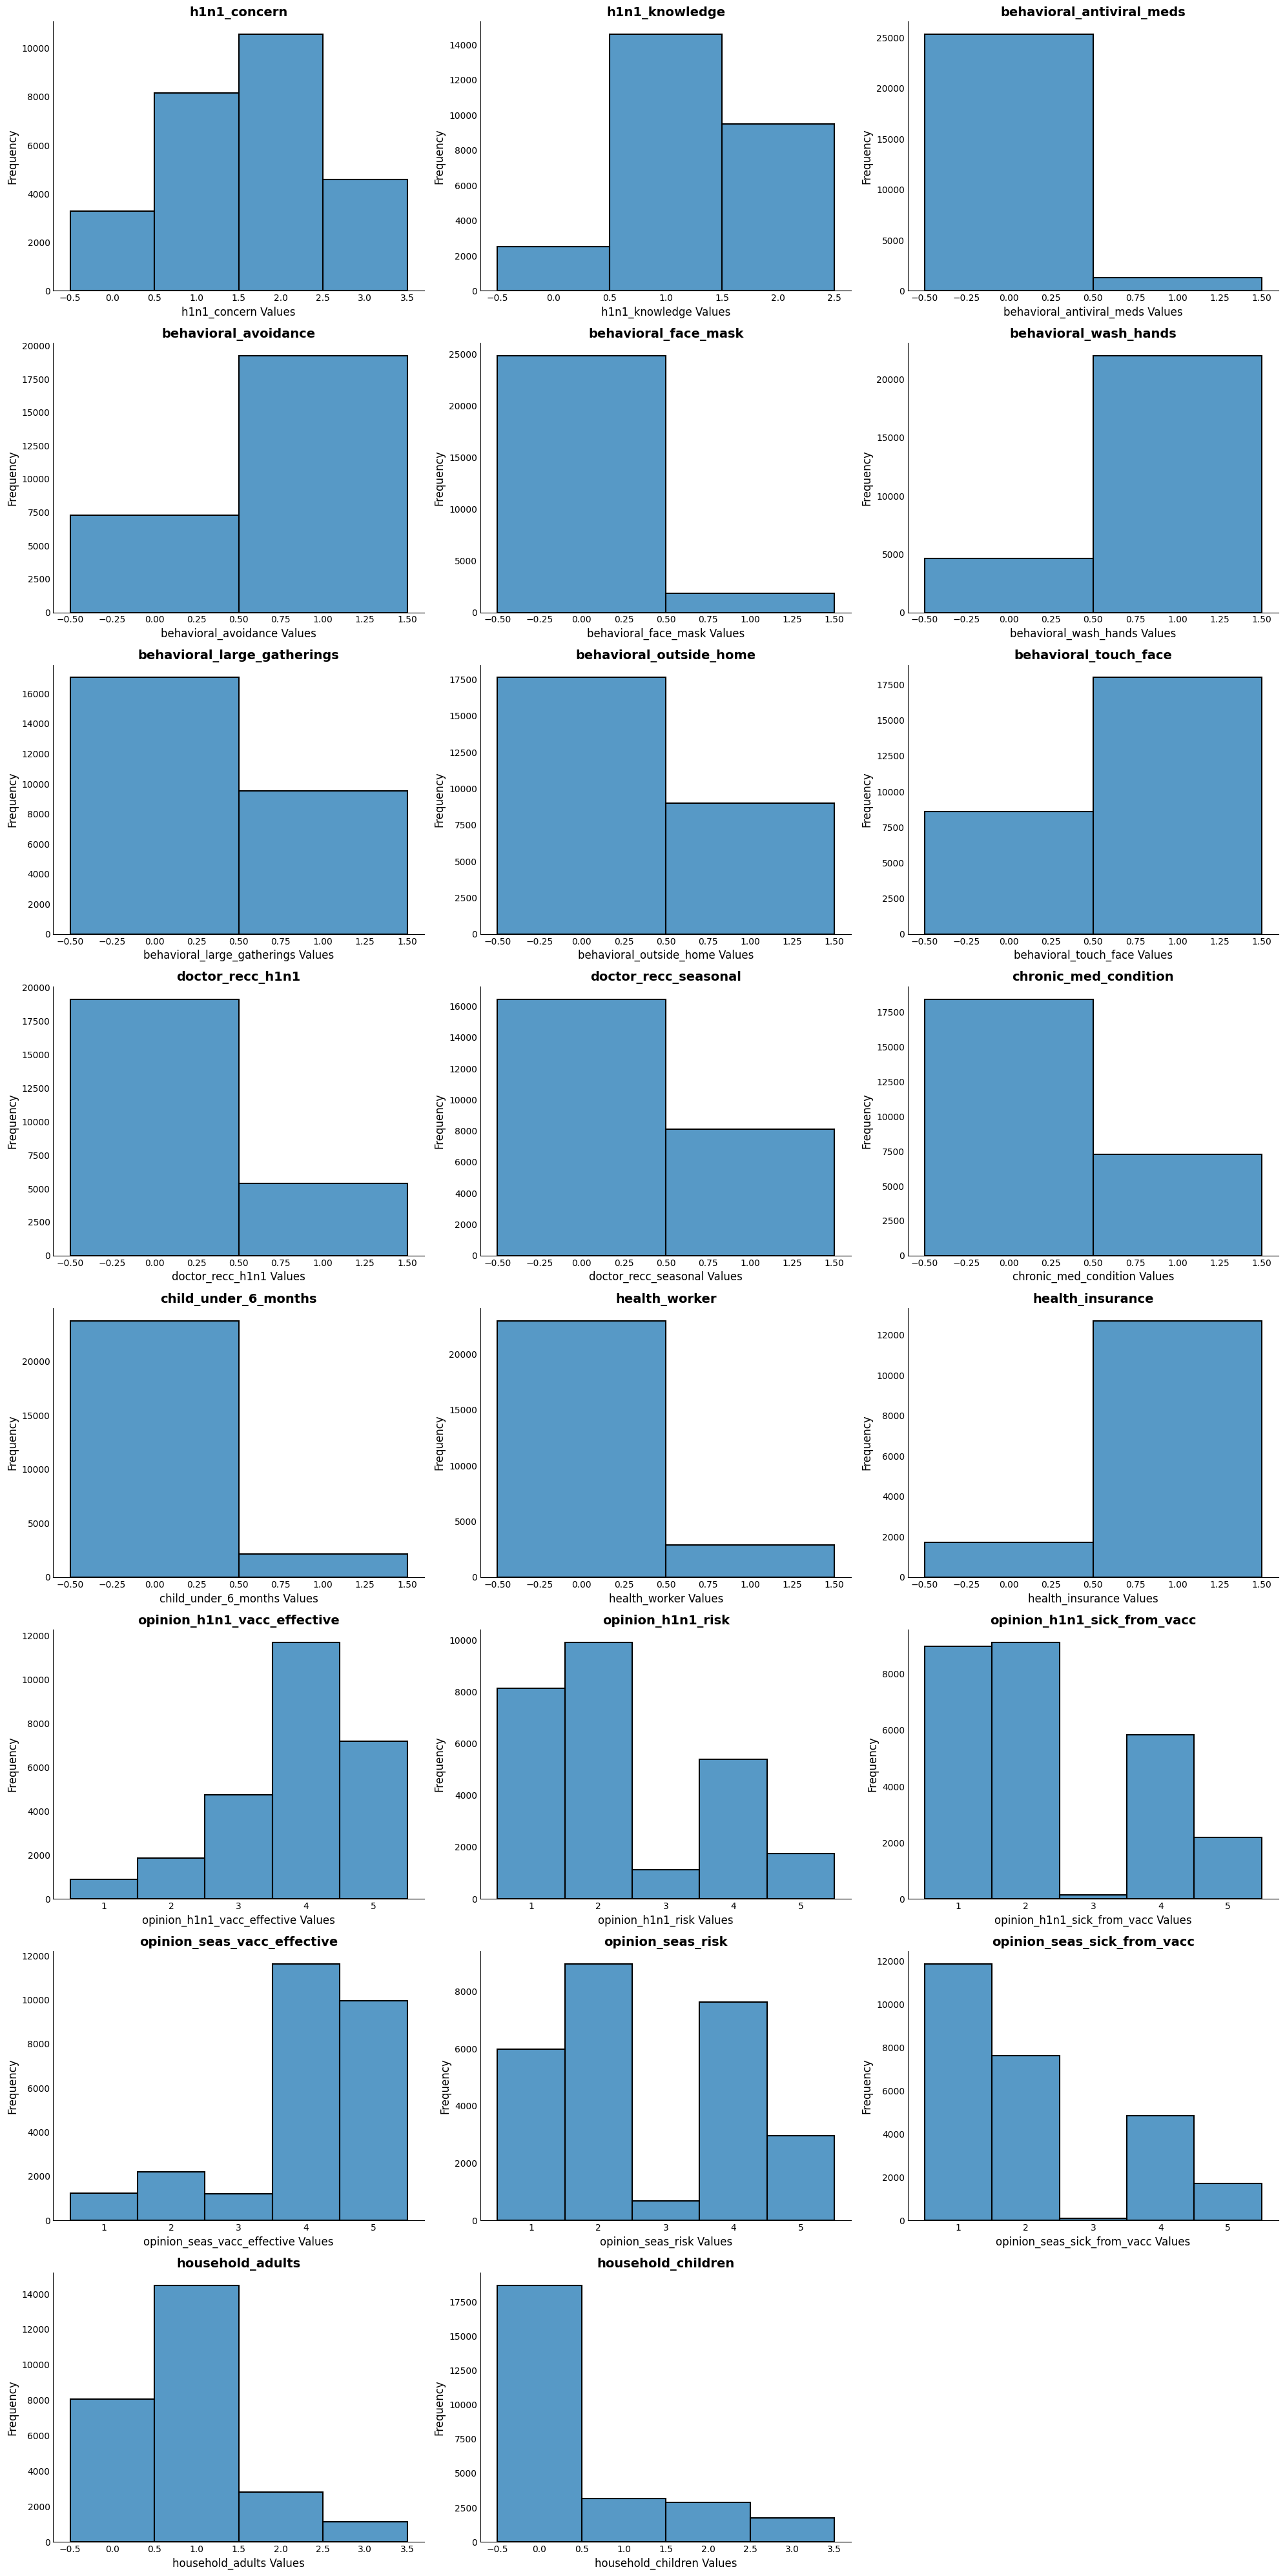

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the number of rows and columns required for the subplot grid
num_vars = len(numeric_columns)  # Total number of numeric variables
num_cols = 3  # You can adjust this number based on your preferences
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate the number of rows needed to fit all plots

# Create the grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

# Plot a histogram for each numeric variable with customized bins and styling
for ax, col in zip(axes, numeric_columns):
    # Determine the number of bins: use the number of unique values, except for 'CGPA'
    #if col == 'CGPA':
    #    bins = 30  # Set a fixed number of bins for CGPA
    #else:
    bins = len(df_train[col].unique())  # Set bins equal to the number of unique values

    # Plot the histogram with Seaborn's histplot (no KDE line yet)
    sns.histplot(df_train[col], bins=bins, ax=ax, kde=False, edgecolor="black",
                 linewidth=1.5, discrete=True)

    # Get the current axes and the lines from the KDE plot
    for line in ax.lines:
        # Adjust the KDE line properties: set color and linewidth
        if isinstance(line, plt.Line2D):  # Ensure it is a line (the KDE line is a Line2D object)
            line.set_color('orange')  # Set KDE line color
            line.set_linewidth(2)  # Set KDE line width

    # Set the title and labels for a cleaner look
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel(f'{col} Values', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Remove grid and ticks for a cleaner look
    ax.grid(False)  # Disable gridlines
    ax.tick_params(axis='both', which='both', length=0)  # Remove ticks

    # Remove the frame (spines) around the plot
    #for spine in ax.spines.values():
    #    spine.set_visible(False)
    spine = list(ax.spines.values())
    spine[3].set_visible(False)
    spine[1].set_visible(False)

# Remove unused subplots if the number of variables is less than the number of subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
#See label output distribution
temp = pd.DataFrame([df_train_out['h1n1_vaccine'].value_counts(),df_train_out['seasonal_vaccine'].value_counts()],index=['h1n1','season']  )
temp['percent']=temp.apply(lambda x: x[1]/x.sum()*100,axis=1)
#temp['percent']=temp['percent']/temp['percent'].sum()
temp

,0,1,percent
h1n1,21033,5674,21.245366
season,14272,12435,46.560827


In [ ]:
def concatenate_columns(row):
    """Concatenates all columns except the last one, handling empty or non-string values.

    Args:
        row: A pandas Series representing a row of the DataFrame.

    Returns:
        A string containing the concatenated values, or an empty string if all values are empty or non-string.
    """

    values = []
    for val in row[2:-1]:
        if pd.notnull(val) and isinstance(val, str):
            values.append(val)
        else:
            try:
                values.append(str(val))
            except (ValueError, TypeError):
                pass  # Skip non-convertible values

    return ' '.join(values) if values else ''

# Sample DataFrame
#df['Concatenated'] = df.apply(concatenate_columns_handling_empty_values, axis=1)
#print(df)

In [ ]:
df_train['Text']=df_train.apply(concatenate_columns, axis=1)
df_train['Class'] = df_train['Depression'].astype(str)


In [ ]:
for model in genai.list_models():
    #if "createTunedModel" in model.supported_generation_methods:
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121
models/embedding-001
models/text-embedding-004
models/aqa


In [ ]:
sampletext = df_train['Text'][100]

system_instruct = """
You are a classification service. From the input texts if you think it is related to a neutral or tend to be a happy person then yout give the output 'Class' with value '0' otherwise value '1'.
"""
baseline_model = genai.GenerativeModel("gemini-1.5-flash-001")
response = baseline_model.generate_content([system_instruct,sampletext])
print(response.text)

Class 1 



In [ ]:
df_train.iloc[100][['Class','Depression']]

,100
Class,0
Depression,0


In [ ]:
print(sampletext)

NameError: name 'sampletext' is not defined

In [ ]:
from google.api_core import retry

# You can use a system instruction to do more direct prompting, and get a
# more succinct answer.

system_instruct = """
You are a classification service. From the input texts if you think it is related to neutral or happy person then yout give the output value '0' otherwise value '1'.
"""

instructed_model = genai.GenerativeModel(f"gemini-1.5-flash-001",
                                         system_instruction=system_instruct)

retry_policy = {"retry": retry.Retry(predicate=retry.if_transient_error)}

# If you want to evaluate your own technique, replace this function with your
# model, prompt and other code and return the predicted answer.
def predict_label(post: str) -> str:
    response = instructed_model.generate_content(post, request_options=retry_policy)
    rc = response.candidates[0]

    # Any errors, filters, recitation, etc we can mark as a general error
    if rc.finish_reason.name != "STOP":
        return "(error)"
    else:
        # Clean up the response.
        return response.text.strip()


#prediction = predict_label(sample_row)

#print(prediction)
#print()
#print("Correct!" if prediction == sample_label else "Incorrect.")

In [ ]:
s=df_train.columns.to_list()
print(s)
a=','.join(s[2:-3])
print(a)

['id', 'Name', 'Gender', 'Age', 'City', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression', 'Text', 'Class']
Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness


In [ ]:
sample_row = df_train['Text'][100]
sample_label = df_train['Class'][100]
prediction = predict_label(sample_row)
print(sample_label)
print(prediction)
print(sample_row)
print("Correct!" if prediction == sample_label else "Incorrect.")

0
0
Female 19.0 Rajkot Student nan 2.0 nan 8.52 4.0 nan Less than 5 hours Unhealthy Class 12 No 6.0 2.0 Yes
Correct!


In [ ]:
hc='The header columns are '+','.join(df_train.columns.to_list()[2:-3])
scaleval='For the number that is not a duration, the small number indicate less important or insiginificant than the higher number.'
letguess='With this information, if it is more than 50% that this person is needed support, you give the output text 1 otherwise 0. The output text needed to be exactly in one character format that is either 0 or 1 no need to explain anything.'
response=baseline_model.generate_content(sample_row + hc+scaleval+letguess)
print('res'+repr(response.text))
sample_label=df_train['Class'][100]
print('alb'+repr(sample_label))
if response.text.strip() == sample_label:
    print('correct')
else:
    print('incorrect')

res'1 \n'
alb'0'
incorrect


In [ ]:
sl=df_train['Class'][100]
print(sl)

0


In [ ]:
#explore
print('Happy are '+str(len(df_train[df_train['Class']=='0'])))
print('Depress are '+str(len(df_train[df_train['Class']=='1'])))
print('Ratio H:D = '+str(115133/25567.0))


In [ ]:
#calculate base line prediction
import time

def cal_baseline(row):
    post=row['Text'] + hc+scaleval+letguess
    prediction = predict_label(post)
    time.sleep(4)
    if prediction == row['Class']:
        #print('correct predict '+prediction+ ' Answer '+row['Class'] )
        return 1
    else:
        return 0

df_happy=df_train[df_train['Class']=='0'].sample(1,random_state=100)
df_depress=df_train[df_train['Class']=='1'].sample(90,random_state=100)

df_eval = pd.concat([df_happy,df_depress],ignore_index=True)

correct = df_eval.apply(cal_baseline,axis=1).sum()
accuracy = correct/100
print(f'accuracy from baseline model {accuracy}')



accuracy from baseline model 0.83


In [ ]:
df_train['Gender']

In [ ]:
df_happy_m=df_train[(df_train['Class']=='0') & (df_train['Working Professional or Student']=='Student')].sample(5000,random_state=5)
df_happy_f=df_train[(df_train['Class']=='0') & (df_train['Working Professional or Student']!='Student')].sample(5000,random_state=5)

df_depress_m=df_train[(df_train['Class']=='1') & (df_train['Working Professional or Student']=='Student')].sample(5000,random_state=5)
df_depress_f=df_train[(df_train['Class']=='1') & (df_train['Working Professional or Student']!='Student')].sample(5000,random_state=5)


df_eval = pd.concat([df_happy_m,df_happy_f,df_depress_m,df_depress_f],ignore_index=True)

len(df_eval)

20000

In [ ]:
from collections.abc import Iterable
import random


# Append a random number to the model ID so you can re-run with a higher chance
# of creating a unique model ID.
model_id = f"newsgroup-classifier-warut-mental6"#{random.randint(10000, 99999)}"

# Upload the training data and queue the tuning job.
tuning_op = genai.create_tuned_model(
    "models/gemini-1.5-flash-001-tuning",
    training_data=df_eval,
    input_key="Text",  # the column to use as input
    output_key="Class",  # the column to use as output
    id=model_id,
    display_name="Mental health classification model",
    batch_size=50,
    epoch_count=5,
)

In [ ]:
deletemodel=[]
for tm in genai.list_tuned_models():
    print(tm.name, tm.state.name)
    if tm.state.name=='ACTIVE':
        model_id=tm.name
    else:
        deletemodel.append(tm.name)

tunedModels/newsgroup-classifier-80856 ACTIVE
tunedModels/newsgroup-classifier-warut-mental ACTIVE
tunedModels/newsgroup-classifier-warut-mental2 ACTIVE
tunedModels/newsgroup-classifier-warut-mental3 ACTIVE
tunedModels/newsgroup-classifier-warut-mental4 ACTIVE
tunedModels/newsgroup-classifier-warut-mental6 ACTIVE
tunedModels/newsgroup-classifier-wt-mental-stu1 CREATING
tunedModels/newsgroup-classifier-wt-mental-pro CREATING


In [ ]:
#model_id='tunedModels/newsgroup-classifier-80856'
#model_id='tunedModels/newsgroup-classifier-warut-mental'
print(model_id)

tunedModels/newsgroup-classifier-warut-mental6


In [ ]:
for d in deletemodel:
    genai.delete_tuned_model(d)

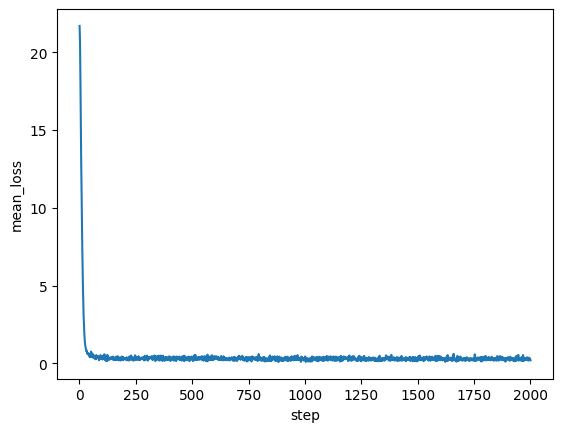

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the loss curve.
tuned_model = genai.get_tuned_model(f"{model_id}")
snapshots = pd.DataFrame(tuned_model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x="step", y="mean_loss")
#plt.clf()
#plt.cla()
plt.savefig('tuning-classification-tabular.png')
plt.show()

In [ ]:
#import matplotlib.pyplot as plt


In [ ]:
from google.api_core import retry
import google.auth
import google.auth.transport.requests
import os
# You can use a system instruction to do more direct prompting, and get a
# more succinct answer.

retry_policy = {"retry": retry.Retry(predicate=retry.if_transient_error)}

# If you want to evaluate your own technique, replace this function with your
# model, prompt and other code and return the predicted answer.
def predict_label_tuned(post: str,apikey) -> str:

    genai.configure(api_key=apikey)
    tuned_model = genai.GenerativeModel(f"{model_id}")

    response = tuned_model.generate_content(post, request_options=retry_policy)
    rc = response.candidates[0]

    # Any errors, filters, recitation, etc we can mark as a general error
    if rc.finish_reason.name != "STOP":
        return "(error)"
    else:
        # Clean up the response.
        return response.text.strip()


#prediction = predict_label(sample_row)

#print(prediction)
#print()
#print("Correct!" if prediction == sample_label else "Incorrect.")

In [ ]:
tuned_model = genai.GenerativeModel(f'{model_id}')
tuned_model.generate_content("I am crazy")

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "I understand that you're feeling overwhelmed and might be using \"crazy\" to express that. It's important to remember that you're not alone and there are people who care about you and want to help. \n\nIf you're feeling overwhelmed, here are some things you can do:\n\n* **Talk to someone you trust:** This could be a friend, family member, therapist, or anyone who you feel comfortable confiding in.\n* **Seek professional help:** A therapist can help you work through your feelings and develop coping mechanisms.\n* **Take care of yourself:** Make sure you're getting enough sleep, eating healthy foods, and exercising regularly.\n* **Engage in activities you enjoy:** This can help you de-stress and improve your mood.\n\nRemember, you are not alone and there is he

In [ ]:
tuned_instruct = """
You are a classification service. From the text between --- and --- if the text is very likely lead to the output '1'.
otherwise give output '0'. ---"""

tuned_model = genai.GenerativeModel(f'{model_id}')

In [ ]:
import time
#calculate base line prediction
def cal_baseline(row):
    post=row['Text'] + hc+scaleval+letguess
    prediction = predict_label_tuned(post,GOOGLE_API_KEY)
    time.sleep(4)
    if prediction == row['Class']:
        return 1
    else:
        return 0

df_happy=df_train[df_train['Class']=='0'].sample(50,random_state=5)
df_depress=df_train[df_train['Class']=='1'].sample(10,random_state=5)

df_eval = pd.concat([df_happy,df_depress],ignore_index=True)

correct = df_eval.apply(cal_baseline,axis=1).sum()
accuracy = correct/60
print(f'accuracy from baseline model {accuracy}')



accuracy from baseline model 0.5333333333333333


In [ ]:
df_test['Text']=df_train.apply(concatenate_columns, axis=1)

In [ ]:
from joblib import Parallel, delayed

df_test_subset = df_test.head(50)

# Parallelize the prediction process
df_test_subset['Depression'] = Parallel(n_jobs=-1)(  # -1 uses all available cores
    delayed(lambda row: predict_label_tuned(row['Text'] + hc+scaleval+letguess,GOOGLE_API_KEY))
    (row) for _, row in df_test_subset.iterrows()
)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

In [ ]:
submit_df = df_test[['id','Depression'][.copy()
submit_df.to_csv('llmsubmission.csv',index=False)

In [ ]:
df_test['Depression']

In [ ]:
response = tuned_model.generate_content(system_instruct+' : '+df_test['Text'][100])
print(response.text)
print('Expected '+df_test['Class'][100])

In [ ]:
new_text="Is Depression '0' or '1' from the following text: "+ df_test['Text'][0]
response = your_model.generate_content(new_text)

In [ ]:
print(response.text)